In [3]:
# Step 1: Data Exploration for IPL Score Prediction

import pandas as pd

# Upload and load dataset
from google.colab import files
uploaded = files.upload()  # Upload your 'ipl.csv' here

ipl_df = pd.read_csv('ipl.csv')

# 1️⃣ Check the shape (rows, columns)
print("✅ Shape of dataset:", ipl_df.shape)

# 2️⃣ View column names and data types
print("\n✅ Column Names and Data Types:")
print(ipl_df.dtypes)

# 3️⃣ Display the first 10 rows to visually inspect structure
print("\n✅ First 10 rows of the dataset:")
display(ipl_df.head(10))

# 4️⃣ Check for missing values
print("\n✅ Missing values in each column:")
print(ipl_df.isnull().sum())


Saving ipl.csv to ipl (1).csv
✅ Shape of dataset: (76014, 15)

✅ Column Names and Data Types:
mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

✅ First 10 rows of the dataset:


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.5,2,0,0,0,222
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,3,0,0.6,3,0,0,0,222
7,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,3,0,1.1,3,0,0,0,222
8,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,7,0,1.2,7,0,4,0,222
9,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,11,0,1.3,11,0,8,0,222



✅ Missing values in each column:
mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64


In [4]:
ipl_df = pd.read_csv('ipl.csv')

# 1 Remove unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
ipl_df.drop(columns=columns_to_remove, inplace=True)

# 2 Filter consistent teams
consistent_teams = [
    'Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab', 'Kolkata Knight Riders',
    'Mumbai Indians', 'Rajasthan Royals', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad'
]
ipl_df = ipl_df[ipl_df['bat_team'].isin(consistent_teams)]
ipl_df = ipl_df[ipl_df['bowl_team'].isin(consistent_teams)]

# 3 Remove data from first 5 overs
ipl_df = ipl_df[ipl_df['overs'] >= 5.0]

# 4 Convert 'date' to datetime
ipl_df['date'] = pd.to_datetime(ipl_df['date'])

# 5 Verification
print("✅ Shape after cleaning:", ipl_df.shape)
print("\n✅ Columns after cleaning:", ipl_df.columns.tolist())
print("\n✅ Data types:\n", ipl_df.dtypes)
print("\n✅ First 5 rows after cleaning:")
display(ipl_df.head())

# Check missing values
print("\n✅ Missing values:\n", ipl_df.isnull().sum())


✅ Shape after cleaning: (40108, 9)

✅ Columns after cleaning: ['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total']

✅ Data types:
 date              datetime64[ns]
bat_team                  object
bowl_team                 object
runs                       int64
wickets                    int64
overs                    float64
runs_last_5                int64
wickets_last_5             int64
total                      int64
dtype: object

✅ First 5 rows after cleaning:


,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222



✅ Missing values:
 date              0
bat_team          0
bowl_team         0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
dtype: int64



✅ Correlation Matrix (partial preview):
total                                    1.000000
runs_last_5                              0.587091
runs                                     0.391254
date                                     0.089303
bowl_team_Kings XI Punjab                0.078670
bat_team_Chennai Super Kings             0.075212
bowl_team_Royal Challengers Bangalore    0.039524
bat_team_Sunrisers Hyderabad             0.035569
bat_team_Mumbai Indians                  0.028980
overs                                    0.028468
bat_team_Kings XI Punjab                 0.015382
bowl_team_Mumbai Indians                 0.015285
bat_team_Royal Challengers Bangalore     0.010391
bowl_team_Delhi Daredevils              -0.002952
bowl_team_Chennai Super Kings           -0.003715
bowl_team_Sunrisers Hyderabad           -0.010563
bat_team_Rajasthan Royals               -0.029065
bowl_team_Rajasthan Royals              -0.043225
bat_team_Kolkata Knight Riders          -0.049526
bowl_team

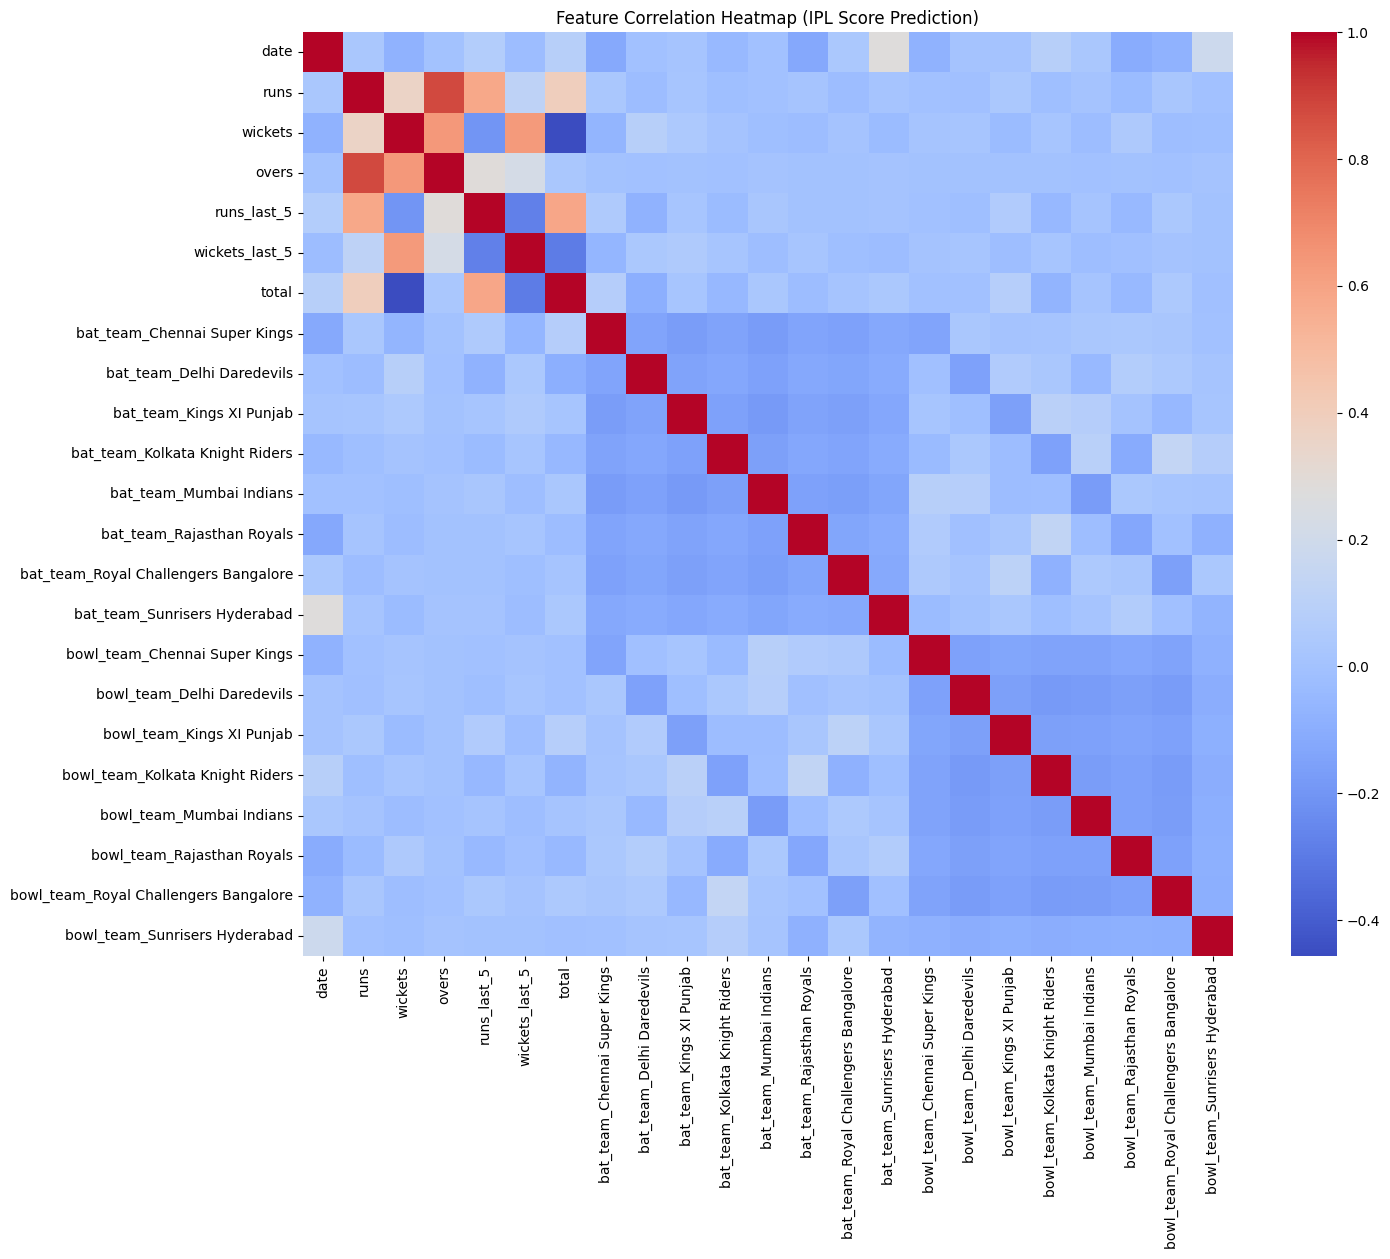

In [6]:
# Step 3 (fixed): Feature Selection with One-Hot Encoding before Correlation Heatmap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# One-Hot Encode 'bat_team' and 'bowl_team'
ipl_encoded = pd.get_dummies(ipl_df, columns=['bat_team', 'bowl_team'])

# Compute the correlation matrix on the encoded dataframe
corr_matrix = ipl_encoded.corr()

# Display the correlation matrix for reference
print("\n✅ Correlation Matrix (partial preview):")
print(corr_matrix['total'].sort_values(ascending=False))

# Plotting the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap (IPL Score Prediction)')
plt.show()



In [7]:
# Step 4: Train-Test Split for IPL Score Prediction

from sklearn.model_selection import train_test_split

# Create feature set X and target y
X = ipl_encoded.drop(['total', 'date'], axis=1)
y = ipl_encoded['total']

# Create training and testing datasets based on date
X_train = X[ipl_encoded['date'].dt.year <= 2016]
X_test = X[ipl_encoded['date'].dt.year == 2017]

y_train = y[ipl_encoded['date'].dt.year <= 2016]
y_test = y[ipl_encoded['date'].dt.year == 2017]

# Confirm shapes
print("✅ X_train shape:", X_train.shape)
print("✅ X_test shape:", X_test.shape)
print("✅ y_train shape:", y_train.shape)
print("✅ y_test shape:", y_test.shape)


✅ X_train shape: (37330, 21)
✅ X_test shape: (2778, 21)
✅ y_train shape: (37330,)
✅ y_test shape: (2778,)


In [9]:
# Step 5: Model Building (Fixed for sklearn version compatibility)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42, n_estimators=100)
ada = AdaBoostRegressor(estimator=LinearRegression(), n_estimators=50, random_state=42)

# Fit models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
ada.fit(X_train, y_train)

# Predict on test data
lr_preds = lr.predict(X_test)
dt_preds = dt.predict(X_test)
rf_preds = rf.predict(X_test)
ada_preds = ada.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"✅ {name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print("-" * 40)

# Evaluate all models
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Decision Tree Regressor", y_test, dt_preds)
evaluate_model("Random Forest Regressor", y_test, rf_preds)
evaluate_model("AdaBoost Regressor", y_test, ada_preds)


✅ Linear Regression Performance:
MAE: 12.12
MSE: 251.01
RMSE: 15.84
----------------------------------------
✅ Decision Tree Regressor Performance:
MAE: 17.11
MSE: 539.92
RMSE: 23.24
----------------------------------------
✅ Random Forest Regressor Performance:
MAE: 13.86
MSE: 337.23
RMSE: 18.36
----------------------------------------
✅ AdaBoost Regressor Performance:
MAE: 12.08
MSE: 244.80
RMSE: 15.65
----------------------------------------


✅ First 10 Predicted vs Actual IPL Scores:


,Actual Score,Predicted Score
0,207,172
1,207,175
2,207,174
3,207,177
4,207,180
5,207,181
6,207,179
7,207,178
8,207,178
9,207,180


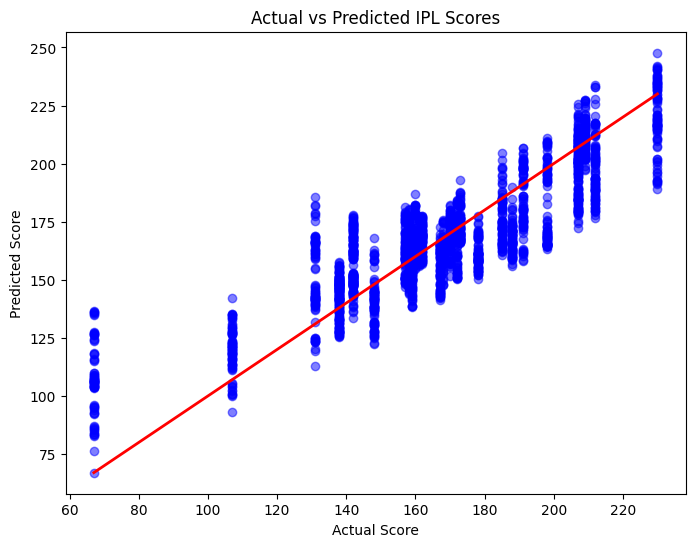

In [10]:
model = lr  # Replace with rf, ada, dt if your tests showed better performance

# Predict on the test data
predictions = model.predict(X_test)

# Create a DataFrame for easy comparison and display
comparison_df = pd.DataFrame({
    'Actual Score': y_test.values,
    'Predicted Score': predictions.astype(int)
})

# Display first 10 comparisons
print("✅ First 10 Predicted vs Actual IPL Scores:")
display(comparison_df.head(10))

# Optional: Plot Actual vs Predicted for visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue')
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted IPL Scores")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()
